### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import jaccard_score
import scipy

### Read csv file

In [2]:
df = pd.read_csv('capture-fisheries-vs-aquaculture.csv')
df

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0
...,...,...,...,...,...
14669,Zimbabwe,ZWE,1965,NaN,2000.0
14670,Zimbabwe,ZWE,1966,NaN,2000.0
14671,Zimbabwe,ZWE,1967,NaN,2000.0
14672,Zimbabwe,ZWE,1968,NaN,2000.0


### Preprocessing

In [3]:
df = df.fillna(0)
df = df.drop('Code', axis=1)
df = df.sort_values(['Entity', 'Year'])
df = df.reset_index(drop=True)
df

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,1960,0.0,200.0
1,Afghanistan,1961,0.0,300.0
2,Afghanistan,1962,0.0,300.0
3,Afghanistan,1963,0.0,300.0
4,Afghanistan,1964,0.0,300.0
...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0
14670,Zimbabwe,2015,10600.0,130399.0
14671,Zimbabwe,2016,10085.0,129202.0
14672,Zimbabwe,2017,10300.0,100710.0


In [4]:
unique_countries = df['Entity'].unique()
print(len(unique_countries))

264


## Global Production per year

In [5]:
# Group the dataframe by the region column and sum the production values
glob_prod = df.groupby('Year')[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']].sum()

# Print the resulting dataframe
glob_prod

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
Year,,
1960,1.915087e+07,2.760285e+08
1961,1.784858e+07,3.106441e+08
1962,1.829723e+07,3.424042e+08
1963,2.046024e+07,3.496285e+08
1964,2.249183e+07,3.947974e+08
1965,2.452617e+07,3.912585e+08
1966,2.671398e+07,4.273355e+08
1967,2.758447e+07,4.567937e+08
1968,2.890886e+07,4.841480e+08


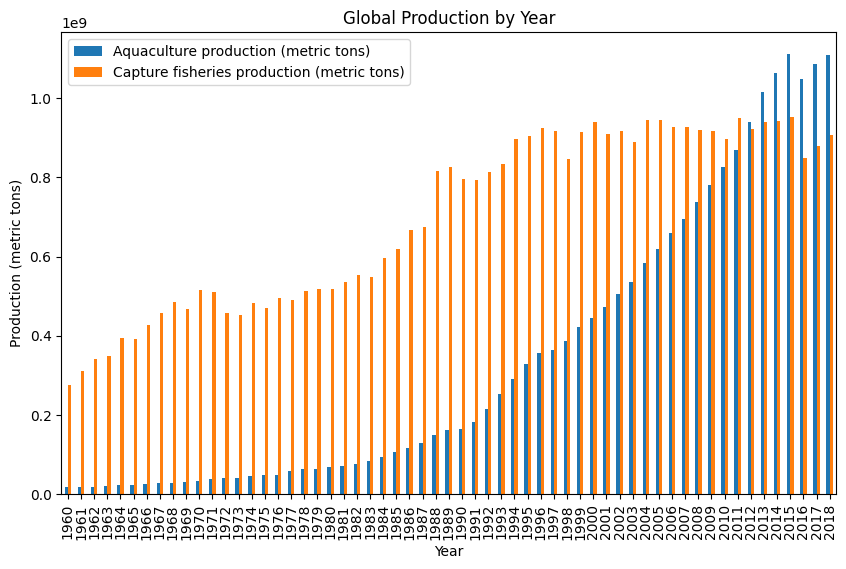

In [6]:
# Plot a grouped bar graph
glob_prod.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Global Production by Year')
plt.xlabel('Year')
plt.ylabel('Production (metric tons)')
plt.show()

### 1. Getting graphs for all countries

In [7]:
unique_countries = df['Entity'].unique()

for country in unique_countries:
    # select the data for a specific country
    country_data = df[df['Entity'] == country]
    plt.figure(figsize=(8,6))
    plt.grid()
    # set the plot title
    plt.title('Production for ' + country)
    # plot the Aquaculture production line graph in blue
    plt.plot(country_data['Year'], country_data['Aquaculture production (metric tons)'], color='blue', label='Aquaculture production', marker = 'o')

    # plot the Capture fisheries production line graph in red
    plt.plot(country_data['Year'], country_data['Capture fisheries production (metric tons)'], color='red', label='Capture fisheries production', marker = 'o')

    # add a legend
    plt.legend()

    # set the x-axis label
    plt.xlabel('Years')

    # set the y-axis label
    plt.ylabel('Production (metric tons)')

    plt.savefig(f'./country_graphs/{country}.png')
    # show the plot
    #plt.show()
    plt.close()

    #print('Done')

#plt.show()
print("Done for all")

Done for all


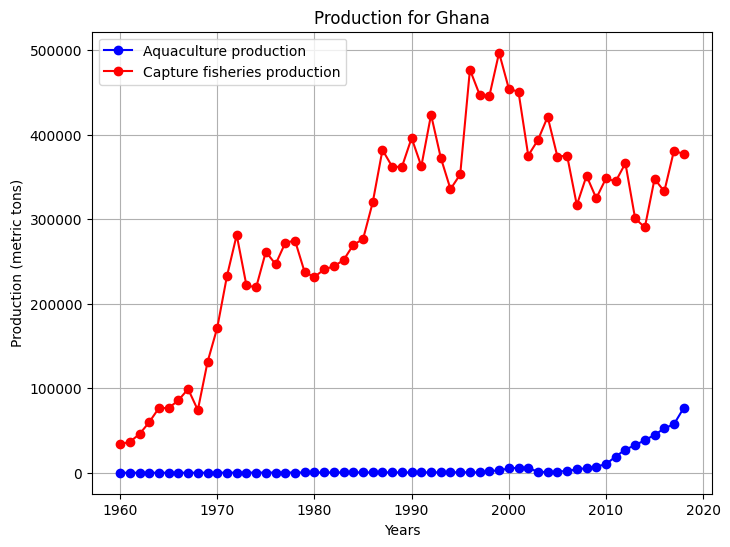

In [8]:
# select the data for a specific country
country_data = df[df['Entity'] == 'Ghana']
plt.figure(figsize=(8,6))
#plt.figure()
plt.grid()
# set the plot title
plt.title('Production for ' + country_data['Entity'].iloc[0])
# plot the Aquaculture production line graph in blue
plt.plot(country_data['Year'], country_data['Aquaculture production (metric tons)'], color='blue', label='Aquaculture production', marker = 'o')

# plot the Capture fisheries production line graph in red
plt.plot(country_data['Year'], country_data['Capture fisheries production (metric tons)'], color='red', label='Capture fisheries production', marker = 'o')

# add a legend
plt.legend()

# set the x-axis label
plt.xlabel('Years')

# set the y-axis label
plt.ylabel('Production (metric tons)')

#plt.savefig(f'./country_graphs/{country}.png')
# show the plot
plt.show()
plt.close()


### Average annual growth rate for each country

#### 2. Which countries have experienced the highest growth in aquaculture production and capture fisheries production over the years?

In [9]:
import pandas as pd

# read the data
#df = pd.read_csv('filepath/fishery_production.csv')

# drop rows with missing production values in the earliest year
df = df.dropna(subset=['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)'], how='any')

# group by country and calculate the growth rate for each country
growth_rate_aqua = df.groupby('Entity')['Aquaculture production (metric tons)'].apply(lambda x: ((x.iloc[-1]/x.iloc[0])**(1/len(x))-1)*100)
growth_rate_aqua = growth_rate_aqua[~(growth_rate_aqua.isnull() | growth_rate_aqua.isin([np.inf, -np.inf]))].sort_values(ascending=False)


growth_rate_fish = df.groupby('Entity')['Capture fisheries production (metric tons)'].apply(lambda x: ((x.iloc[-1]/x.iloc[0])**(1/len(x))-1)*100)
growth_rate_fish = growth_rate_fish[~(growth_rate_fish.isnull() | growth_rate_fish.isin([np.inf, -np.inf]))].sort_values(ascending=False)


# print the top 5 countries with the highest growth rate in aquaculture production
print('Countries with the highest growth in aquaculture production:')
print(growth_rate_aqua.head())

# print the top 5 countries with the highest growth rate in capture fisheries production
print('Countries with the highest growth in capture fisheries production:')
print(growth_rate_fish.head())


Countries with the highest growth in aquaculture production:
Entity
Latin America & Caribbean (excluding high income)    18.115131
Latin America & Caribbean                            18.016525
Latin America & Caribbean (IDA & IBRD)               17.998292
Chile                                                17.841360
Myanmar                                              17.584450
Name: Aquaculture production (metric tons), dtype: float64
Countries with the highest growth in capture fisheries production:
Entity
Micronesia (country)    10.298482
Belize                   9.735263
Eritrea                  8.842631
Zimbabwe                 7.898355
Seychelles               7.730285
Name: Capture fisheries production (metric tons), dtype: float64


/var/folders/fh/x_bg_s7545j5v2830107w1400000gn/T/ipykernel_66779/176517598.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  growth_rate_aqua = df.groupby('Entity')['Aquaculture production (metric tons)'].apply(lambda x: ((x.iloc[-1]/x.iloc[0])**(1/len(x))-1)*100)
/var/folders/fh/x_bg_s7545j5v2830107w1400000gn/T/ipykernel_66779/176517598.py:10: RuntimeWarning: invalid value encountered in scalar divide
  growth_rate_aqua = df.groupby('Entity')['Aquaculture production (metric tons)'].apply(lambda x: ((x.iloc[-1]/x.iloc[0])**(1/len(x))-1)*100)
/var/folders/fh/x_bg_s7545j5v2830107w1400000gn/T/ipykernel_66779/176517598.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  growth_rate_fish = df.groupby('Entity')['Capture fisheries production (metric tons)'].apply(lambda x: ((x.iloc[-1]/x.iloc[0])**(1/len(x))-1)*100)
/var/folders/fh/x_bg_s7545j5v2830107w1400000gn/T/ipykernel_66779/176517598.py:14: RuntimeWarning: invalid value encountered in scalar divide
  

In [10]:
growth_rate_aqua

Entity
Latin America & Caribbean (excluding high income)    18.115131
Latin America & Caribbean                            18.016525
Latin America & Caribbean (IDA & IBRD)               17.998292
Chile                                                17.841360
Myanmar                                              17.584450
                                                       ...    
Azerbaijan                                           -3.928958
Latvia                                               -3.984186
Kazakhstan                                           -4.664334
Tajikistan                                           -5.961739
Turkmenistan                                        -10.752213
Name: Aquaculture production (metric tons), Length: 103, dtype: float64

In [11]:
growth_rate_fish

Entity
Micronesia (country)    10.298482
Belize                   9.735263
Eritrea                  8.842631
Zimbabwe                 7.898355
Seychelles               7.730285
                          ...    
Lithuania               -5.368785
Armenia                 -5.885236
Slovenia                -9.499602
Moldova                -10.312982
Azerbaijan             -10.799724
Name: Capture fisheries production (metric tons), Length: 246, dtype: float64

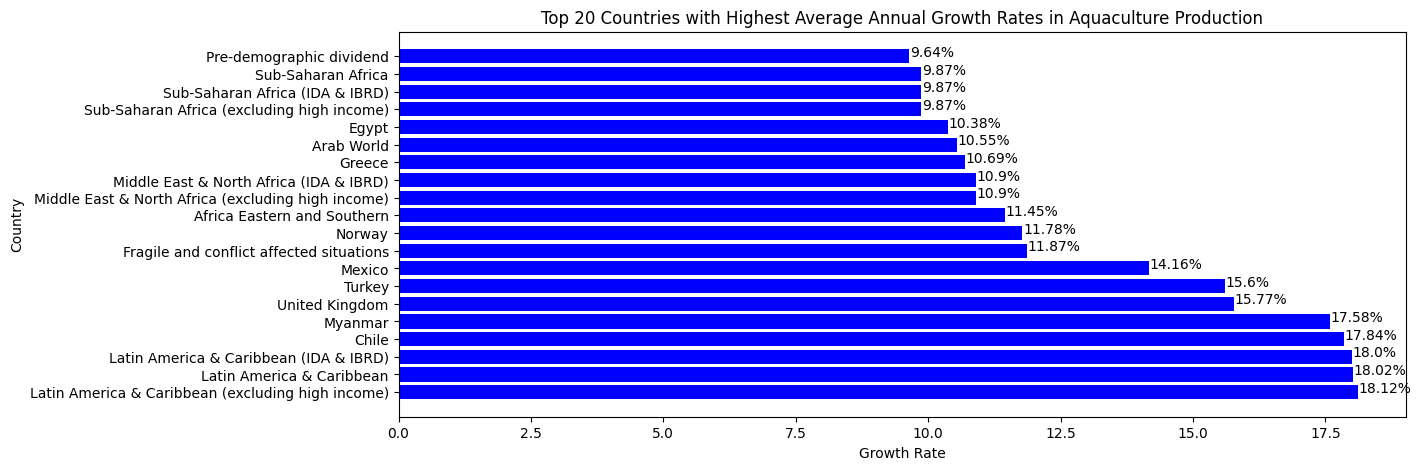

In [12]:
import matplotlib.pyplot as plt

# Get the top 10 countries with highest growth rates in aquaculture production
top_aqua = growth_rate_aqua.nlargest(20)

# Create a horizontal bar chart for aquaculture production
plt.figure(figsize=(13, 5))
plt.barh(top_aqua.index, top_aqua.values, color='blue')

# Add growth rate value for each country
for i, v in enumerate(top_aqua.values):
    plt.text(v + 0.01, i, str(round(v, 2)) + '%')

plt.title('Top 20 Countries with Highest Average Annual Growth Rates in Aquaculture Production')
plt.xlabel('Growth Rate')
plt.ylabel('Country')
plt.show()


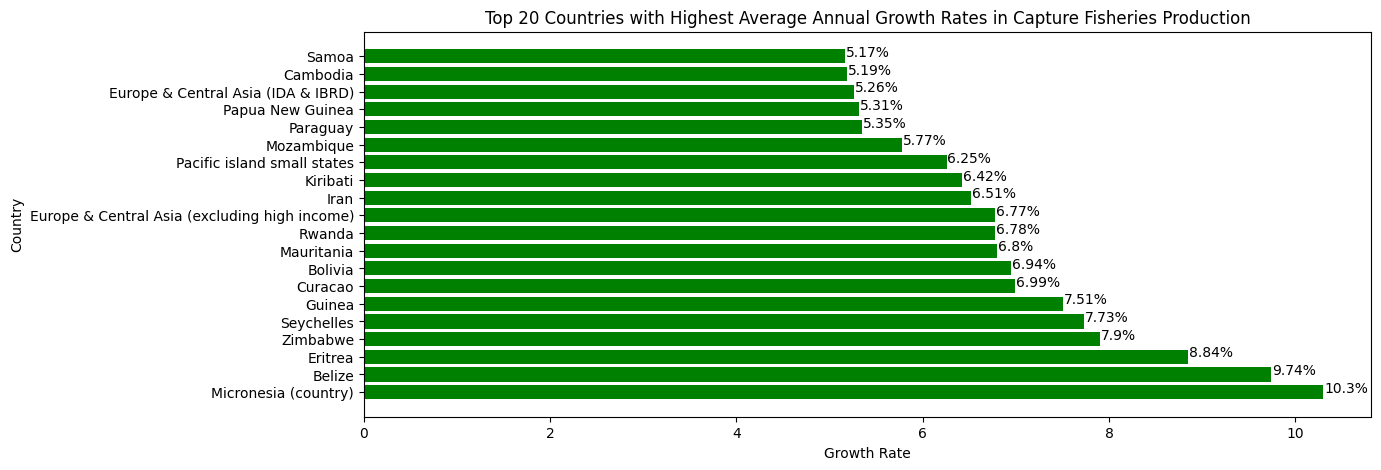

In [13]:
# Get the top 10 countries with highest growth rates in capture fisheries production
top_fish = growth_rate_fish.nlargest(20)

# Create a horizontal bar chart for capture fisheries production
plt.figure(figsize=(13, 5))
plt.barh(top_fish.index, top_fish.values, color='green')

# Add growth rate value for each country
for i, v in enumerate(top_fish.values):
    plt.text(v + 0.01, i, str(round(v, 2)) + '%')

plt.title('Top 20 Countries with Highest Average Annual Growth Rates in Capture Fisheries Production')
plt.xlabel('Growth Rate')
plt.ylabel('Country')
plt.show()

#### 3. Are there any countries that have seen a decline in their capture fisheries production while simultaneously experiencing an increase in their aquaculture production?


In [14]:
# Select rows with positive growth rate in aquaculture production
positive_aqua = growth_rate_aqua > 0

# Select rows with negative growth rate in capture fisheries production
negative_fish = growth_rate_fish < 0

# Select rows that satisfy both conditions
result = pd.concat([growth_rate_aqua[positive_aqua], growth_rate_fish[negative_fish]], axis=1, join='inner')


In [15]:
result

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
Entity,,
United Kingdom,15.768159,-0.636030
Greece,10.694120,-0.203489
Montenegro,9.089983,-1.261611
North Korea,8.454862,-0.608617
Canada,7.312131,-0.308730
Italy,6.901881,-0.056559
Sweden,5.449287,-0.200601
Armenia,4.308262,-5.885236
Austria,3.123596,-3.850632


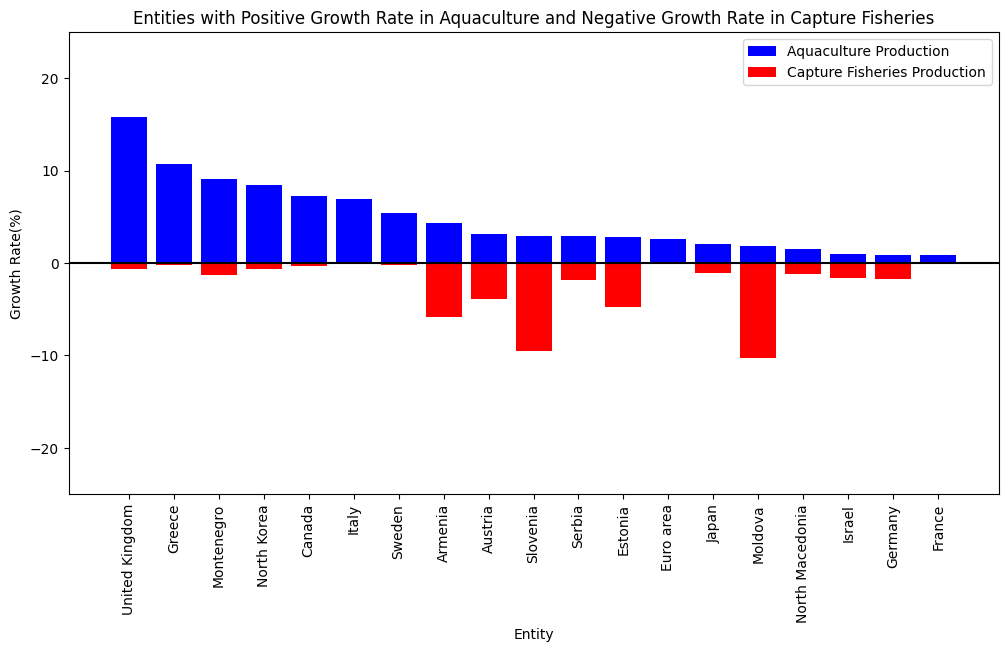

In [16]:
import matplotlib.pyplot as plt

# Get the entities with positive growth rate in aquaculture production and negative growth rate in capture fisheries production
#positive_aqua_negative_fish = growth_rates[(growth_rates['Growth Rate Aqua'] > 0) & (growth_rates['Growth Rate Fish'] < 0)]

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis to be the entities
x = range(len(result))
ax.set_xticks(x)
ax.set_xticklabels(result.index)

# Set the y-axis limits to be from -100 to 100
ax.set_ylim([-25, 25])

# Create a bar for aquaculture production with positive growth rate
ax1 = ax.bar(x, result['Aquaculture production (metric tons)'], color='blue')

# Create a bar for capture fisheries production with negative growth rate
ax2 = ax.bar(x, result['Capture fisheries production (metric tons)'], color='red')

# Add a horizontal line at y=0
ax.axhline(y=0, color='black')

# Add a title and labels
ax.set_title('Entities with Positive Growth Rate in Aquaculture and Negative Growth Rate in Capture Fisheries')
ax.set_xlabel('Entity')
ax.set_ylabel('Growth Rate(%)')

ax.legend((ax1, ax2), ('Aquaculture Production', 'Capture Fisheries Production'))

plt.xticks(rotation=90)
#plt.legend("Aqua", "Culture")

plt.show()


In [17]:
import plotly.graph_objects as gp
# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= result.index, x = result['Aquaculture production (metric tons)'],
					name = 'Aquaculture production',
					orientation = 'h'))

# Adding Female data to the figure
fig.add_trace(gp.Bar(y= result.index, x = result['Capture fisheries production (metric tons)'],
					name = 'Capture Fisheres production', orientation = 'h'))

# Updating the layout for our graph
fig.update_layout(title = 'Growth Rate Balance',
				title_font_size = 22, barmode = 'relative',
				bargap = 0.3, bargroupgap = 0,
				xaxis = dict(tickvals = [-20, -15, -10, -5, 0, 5, 10, 15, 20],	
							title = 'Growth rates (percentages %)',
							title_font_size = 8))

fig.show()


### 4. How do different regions of the world compare in terms of their capture fisheries and aquaculture production?

In [18]:
map_df = pd.read_csv('continents.csv')
map_df = map_df.drop('sub-region', axis = 1)
map_df = map_df.dropna()
map_df

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [19]:
unique_regions = map_df['region'].unique()
print(len(unique_regions))
print(unique_regions)

5
['Asia' 'Europe' 'Africa' 'Oceania' 'Americas']


In [20]:
data_df = df
# Use the map function to create a new column for region
data_df['Region'] = data_df['Entity'].map(map_df.set_index('name')['region'])

# View the resulting dataframe
print(data_df.head())

        Entity  Year  Aquaculture production (metric tons)  \
0  Afghanistan  1960                                   0.0   
1  Afghanistan  1961                                   0.0   
2  Afghanistan  1962                                   0.0   
3  Afghanistan  1963                                   0.0   
4  Afghanistan  1964                                   0.0   

   Capture fisheries production (metric tons) Region  
0                                       200.0   Asia  
1                                       300.0   Asia  
2                                       300.0   Asia  
3                                       300.0   Asia  
4                                       300.0   Asia  


In [21]:
data_df

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region
0,Afghanistan,1960,0.0,200.0,Asia
1,Afghanistan,1961,0.0,300.0,Asia
2,Afghanistan,1962,0.0,300.0,Asia
3,Afghanistan,1963,0.0,300.0,Asia
4,Afghanistan,1964,0.0,300.0,Asia
...,...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0,Africa
14670,Zimbabwe,2015,10600.0,130399.0,Africa
14671,Zimbabwe,2016,10085.0,129202.0,Africa
14672,Zimbabwe,2017,10300.0,100710.0,Africa


In [22]:
data_df = data_df.dropna()
data_df

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region
0,Afghanistan,1960,0.0,200.0,Asia
1,Afghanistan,1961,0.0,300.0,Asia
2,Afghanistan,1962,0.0,300.0,Asia
3,Afghanistan,1963,0.0,300.0,Asia
4,Afghanistan,1964,0.0,300.0,Asia
...,...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0,Africa
14670,Zimbabwe,2015,10600.0,130399.0,Africa
14671,Zimbabwe,2016,10085.0,129202.0,Africa
14672,Zimbabwe,2017,10300.0,100710.0,Africa


In [23]:
# Group the dataframe by the region column and sum the production values
region_sum = data_df.groupby('Region')[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']].sum()

# Print the resulting dataframe
print(region_sum)


          Aquaculture production (metric tons)  \
Region                                           
Africa                            2.417214e+07   
Americas                          6.711237e+07   
Asia                              1.723388e+09   
Europe                            8.145585e+07   
Oceania                           4.892763e+06   

          Capture fisheries production (metric tons)  
Region                                                
Africa                                  3.169976e+08  
Americas                                1.168901e+09  
Asia                                    1.953563e+09  
Europe                                  7.999446e+08  
Oceania                                 4.552267e+07  


In [24]:
region_sum

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
Region,,
Africa,2.417214e+07,3.169976e+08
Americas,6.711237e+07,1.168901e+09
Asia,1.723388e+09,1.953563e+09
Europe,8.145585e+07,7.999446e+08
Oceania,4.892763e+06,4.552267e+07


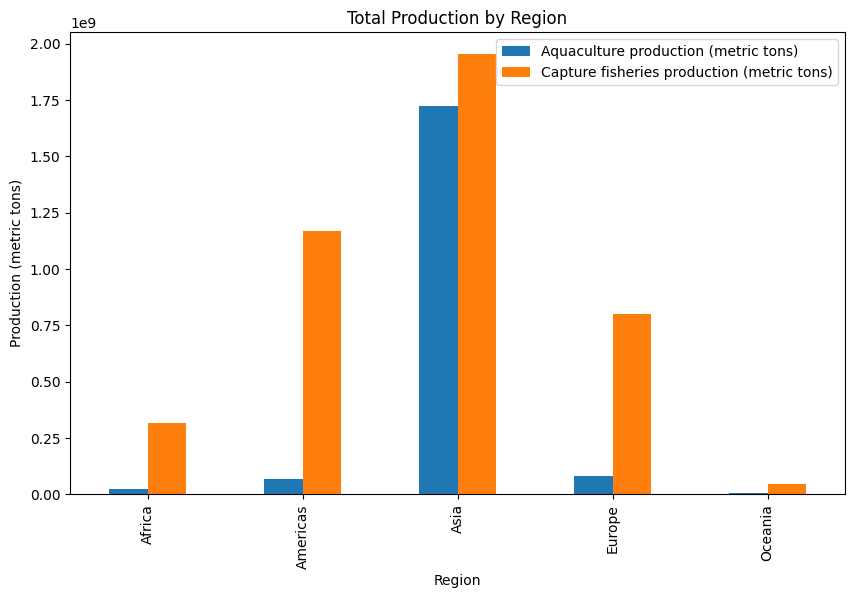

In [25]:
# Plot a grouped bar graph
region_sum.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Total Production by Region')
plt.xlabel('Region')
plt.ylabel('Production (metric tons)')
plt.show()


### K-Means Clustering

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [27]:
df

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region
0,Afghanistan,1960,0.0,200.0,Asia
1,Afghanistan,1961,0.0,300.0,Asia
2,Afghanistan,1962,0.0,300.0,Asia
3,Afghanistan,1963,0.0,300.0,Asia
4,Afghanistan,1964,0.0,300.0,Asia
...,...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0,Africa
14670,Zimbabwe,2015,10600.0,130399.0,Africa
14671,Zimbabwe,2016,10085.0,129202.0,Africa
14672,Zimbabwe,2017,10300.0,100710.0,Africa


In [32]:
clustering = data_df.drop('Region', axis=1)
clustering

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,1960,0.0,200.0
1,Afghanistan,1961,0.0,300.0
2,Afghanistan,1962,0.0,300.0
3,Afghanistan,1963,0.0,300.0
4,Afghanistan,1964,0.0,300.0
...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0
14670,Zimbabwe,2015,10600.0,130399.0
14671,Zimbabwe,2016,10085.0,129202.0
14672,Zimbabwe,2017,10300.0,100710.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



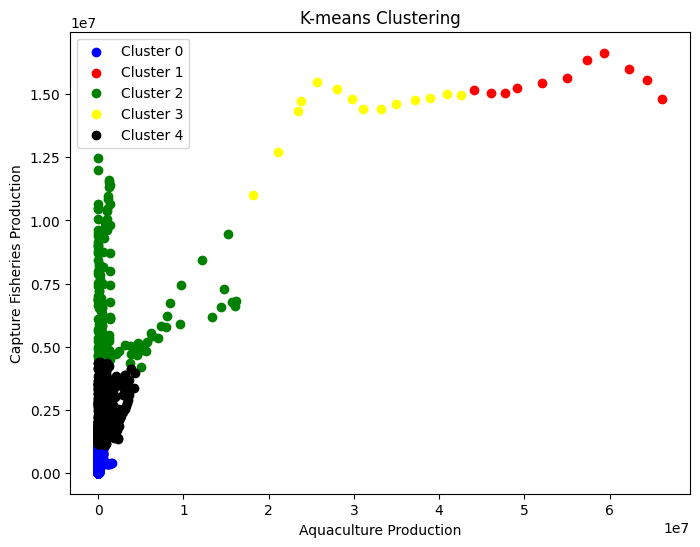

In [33]:
# Select the columns for clustering
X = clustering[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
X

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add the predicted clusters to the original dataframe
clustering['Cluster'] = kmeans.labels_

# Visualize the clusters
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'yellow', 'black']
for i in range(len(colors)):
    cluster = clustering[clustering['Cluster'] == i]
    ax.scatter(cluster['Aquaculture production (metric tons)'], cluster['Capture fisheries production (metric tons)'], c=colors[i], label=f'Cluster {i}')
ax.legend()
ax.set_xlabel('Aquaculture Production')
ax.set_ylabel('Capture Fisheries Production')
ax.set_title('K-means Clustering')
plt.show()


In [34]:
clustering

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Cluster
0,Afghanistan,1960,0.0,200.0,0
1,Afghanistan,1961,0.0,300.0,0
2,Afghanistan,1962,0.0,300.0,0
3,Afghanistan,1963,0.0,300.0,0
4,Afghanistan,1964,0.0,300.0,0
...,...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0,0
14670,Zimbabwe,2015,10600.0,130399.0,0
14671,Zimbabwe,2016,10085.0,129202.0,0
14672,Zimbabwe,2017,10300.0,100710.0,0


In [35]:
unique_clusters = clustering['Cluster'].unique()
print(len(unique_clusters))
print(unique_clusters)

5
[0 4 2 3 1]


In [41]:
cluster = clustering[clustering['Cluster'] == 5]
cluster

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Cluster


## Consumption levels 

In [42]:
cons_df = pd.read_csv('fish-and-seafood-consumption-per-capita.csv')
cons_df

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03
...,...,...,...,...
11023,Zimbabwe,ZWE,2013,2.82
11024,Zimbabwe,ZWE,2014,3.39
11025,Zimbabwe,ZWE,2015,3.82
11026,Zimbabwe,ZWE,2016,3.79


In [43]:
cons_df = cons_df.fillna(0)
cons_df = cons_df.drop('Code', axis=1)
cons_df = cons_df.sort_values(['Entity', 'Year'])
cons_df = cons_df.reset_index(drop=True)
cons_df

,Entity,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,1961,0.03
1,Afghanistan,1962,0.03
2,Afghanistan,1963,0.03
3,Afghanistan,1964,0.03
4,Afghanistan,1965,0.03
...,...,...,...
11023,Zimbabwe,2013,2.82
11024,Zimbabwe,2014,3.39
11025,Zimbabwe,2015,3.82
11026,Zimbabwe,2016,3.79


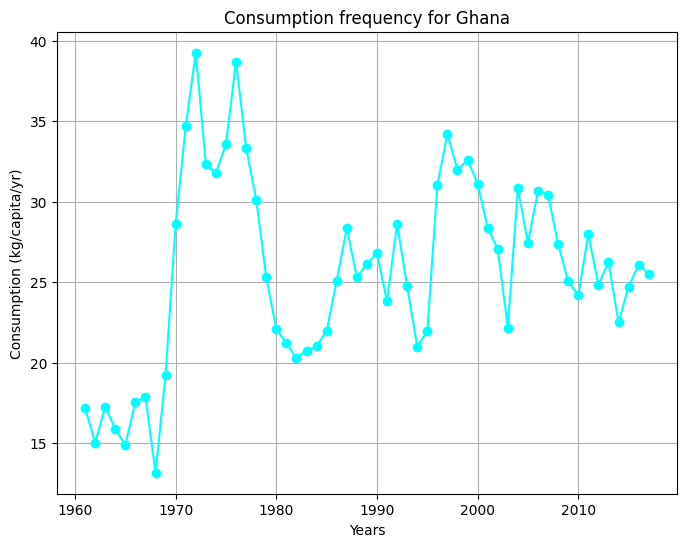

In [44]:
# select the data for a specific country
country_data = cons_df[cons_df['Entity'] == 'Ghana']
plt.figure(figsize=(8,6))
#plt.figure()
plt.grid()
# set the plot title
plt.title('Consumption frequency for ' + country_data['Entity'].iloc[0])

# plot the Aquaculture production line graph in blue
plt.plot(country_data['Year'], country_data['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'], color='cyan', label='Aquaculture production', marker = 'o')
#country_data.plot(kind='bar')

# add a legend
#plt.legend()

# Plot a grouped bar graph
#glob_prod.plot(kind='bar', figsize=(10, 6))

# Add title and labels
#plt.title('Global Production by Year')
#plt.xlabel('Year')
#plt.ylabel('Production (metric tons)')
#plt.show()

# set the x-axis label
plt.xlabel('Years')

# set the y-axis label
plt.ylabel('Consumption (kg/capita/yr)')

#plt.savefig(f'./country_graphs/{country}.png')
# show the plot
plt.show()
plt.close()


In [45]:
# Group the dataframe by the region column and sum the production values
glob_cons = cons_df.groupby('Year')[['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']].sum()

# Print the resulting dataframe
glob_cons

,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Year,
1961,2160.90
1962,2203.31
1963,2265.68
1964,2324.03
1965,2404.52
1966,2525.48
1967,2544.45
1968,2572.68
1969,2565.12


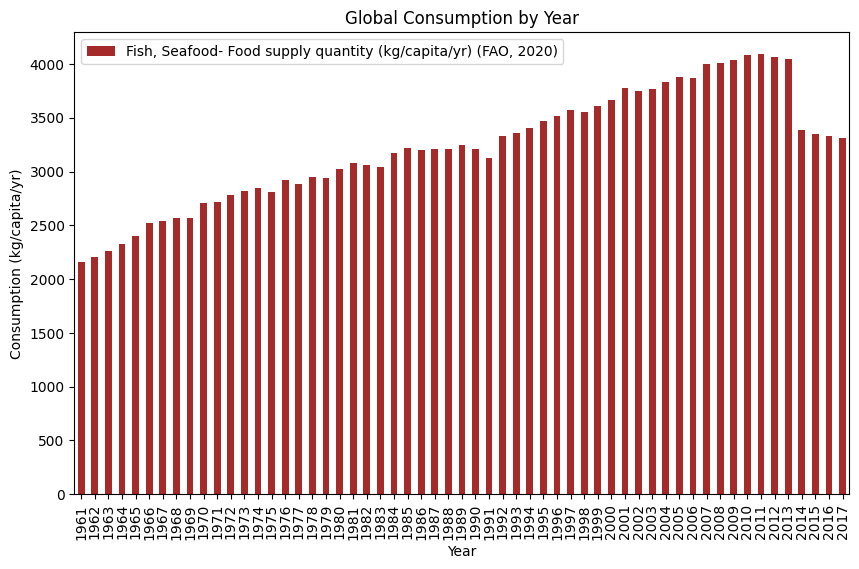

In [46]:
# Plot a grouped bar graph
glob_cons.plot(kind='bar', figsize=(10, 6), color='brown')

# Add title and labels
plt.title('Global Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Consumption (kg/capita/yr)')
plt.show()

## Make a prediction model to predict that aquaculture production and capture fihseries production predict consumption
### Measure correlation between aqua and consumption
### Measure correlation between fish and consumption
### Measure correlation between both and consumption

In [47]:
cons_df

,Entity,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,1961,0.03
1,Afghanistan,1962,0.03
2,Afghanistan,1963,0.03
3,Afghanistan,1964,0.03
4,Afghanistan,1965,0.03
...,...,...,...
11023,Zimbabwe,2013,2.82
11024,Zimbabwe,2014,3.39
11025,Zimbabwe,2015,3.82
11026,Zimbabwe,2016,3.79


In [48]:
# Group the dataframe by the region column and sum the production values
glob_prod = df.groupby('Year')[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']].sum()

# Print the resulting dataframe
glob_prod

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
Year,,
1960,1.915087e+07,2.760285e+08
1961,1.784858e+07,3.106441e+08
1962,1.829723e+07,3.424042e+08
1963,2.046024e+07,3.496285e+08
1964,2.249183e+07,3.947974e+08
1965,2.452617e+07,3.912585e+08
1966,2.671398e+07,4.273355e+08
1967,2.758447e+07,4.567937e+08
1968,2.890886e+07,4.841480e+08


In [49]:
df_copy = df
df_copy

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region
0,Afghanistan,1960,0.0,200.0,Asia
1,Afghanistan,1961,0.0,300.0,Asia
2,Afghanistan,1962,0.0,300.0,Asia
3,Afghanistan,1963,0.0,300.0,Asia
4,Afghanistan,1964,0.0,300.0,Asia
...,...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0,Africa
14670,Zimbabwe,2015,10600.0,130399.0,Africa
14671,Zimbabwe,2016,10085.0,129202.0,Africa
14672,Zimbabwe,2017,10300.0,100710.0,Africa


In [50]:
merged_df = pd.merge(df_copy, cons_df, on=['Entity', 'Year'])

In [51]:
merged_df

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,1961,0.0,300.0,Asia,0.03
1,Afghanistan,1962,0.0,300.0,Asia,0.03
2,Afghanistan,1963,0.0,300.0,Asia,0.03
3,Afghanistan,1964,0.0,300.0,Asia,0.03
4,Afghanistan,1965,0.0,300.0,Asia,0.03
...,...,...,...,...,...,...
9014,Zimbabwe,2013,10090.0,128899.0,Africa,2.82
9015,Zimbabwe,2014,10600.0,144885.0,Africa,3.39
9016,Zimbabwe,2015,10600.0,130399.0,Africa,3.82
9017,Zimbabwe,2016,10085.0,129202.0,Africa,3.79


In [52]:
reg_data = merged_df.drop(columns=['Entity', 'Year'], axis=1)
reg_data

,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,0.0,300.0,Asia,0.03
1,0.0,300.0,Asia,0.03
2,0.0,300.0,Asia,0.03
3,0.0,300.0,Asia,0.03
4,0.0,300.0,Asia,0.03
...,...,...,...,...
9014,10090.0,128899.0,Africa,2.82
9015,10600.0,144885.0,Africa,3.39
9016,10600.0,130399.0,Africa,3.82
9017,10085.0,129202.0,Africa,3.79


In [53]:
reg_data.to_csv('regression.csv')

In [54]:
# Group the dataframe by the region column and sum the production values
clust_df = merged_df.groupby('Entity')[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']].sum()

# Print the resulting dataframe
clust_df

,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Entity,,,
Afghanistan,4.860000e+04,5.060000e+04,4.46
Albania,6.812100e+04,3.495886e+05,188.70
Algeria,2.803851e+04,4.347907e+06,181.69
Angola,5.311000e+03,1.389982e+07,832.90
Antigua and Barbuda,6.800000e+01,1.044340e+05,2450.43
...,...,...,...
Vietnam,4.575644e+07,6.945918e+07,1073.33
World,1.383599e+09,4.060834e+09,719.12
Yemen,1.680000e+03,5.729322e+06,290.32


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



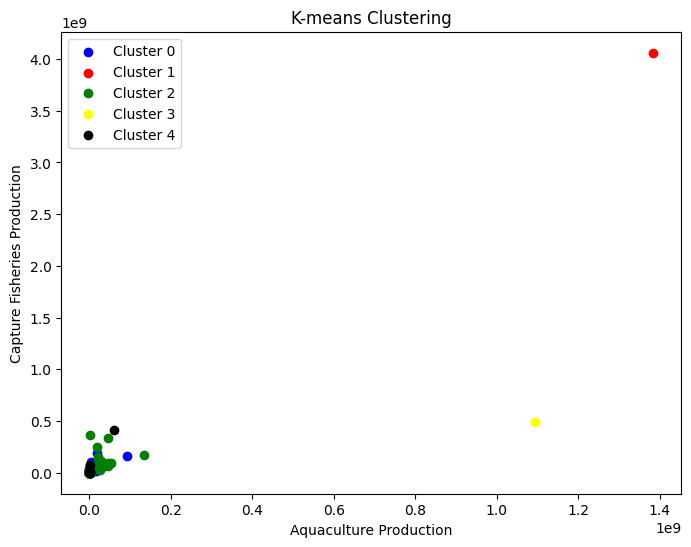

In [55]:
# Select the columns for clustering
X = clust_df[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
X

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add the predicted clusters to the original dataframe
clust_df['Cluster'] = kmeans.labels_

# Visualize the clusters
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'yellow', 'black']
for i in range(len(colors)):
    cluster = clust_df[clust_df['Cluster'] == i]
    ax.scatter(cluster['Aquaculture production (metric tons)'], cluster['Capture fisheries production (metric tons)'], c=colors[i], label=f'Cluster {i}')
ax.legend()
ax.set_xlabel('Aquaculture Production')
ax.set_ylabel('Capture Fisheries Production')
ax.set_title('K-means Clustering')
plt.show()


In [56]:
clust_df

,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)",Cluster
Entity,,,,
Afghanistan,4.860000e+04,5.060000e+04,4.46,0
Albania,6.812100e+04,3.495886e+05,188.70,0
Algeria,2.803851e+04,4.347907e+06,181.69,0
Angola,5.311000e+03,1.389982e+07,832.90,0
Antigua and Barbuda,6.800000e+01,1.044340e+05,2450.43,2
...,...,...,...,...
Vietnam,4.575644e+07,6.945918e+07,1073.33,2
World,1.383599e+09,4.060834e+09,719.12,1
Yemen,1.680000e+03,5.729322e+06,290.32,0


In [74]:
cluster = clust_df[clust_df['Cluster'] == 4]
list(cluster.index)


['Hong Kong', 'Iceland', 'Japan', 'Kiribati', 'Maldives', 'Portugal']

### Regression model

In [43]:
from sklearn import linear_model
X = reg_data.iloc[:, 0:2]
#print(X)
y = reg_data.iloc[:, -1]
#print(y)

In [44]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [45]:
predictions = lm.predict(X)
print(predictions[0:5])

[16.85717009 16.85717009 16.85717009 16.85717009 16.85717009]


In [46]:
lm.score(X,y)

0.0012459153864218253

In [47]:
lm.coef_

array([1.18105044e-07, 4.10071323e-08])

In [48]:
lm.intercept_

16.857157784915124

### Correlation b/n global production and global consumption

In [49]:
glob_prod

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
Year,,
1960,1.915087e+07,2.760285e+08
1961,1.784858e+07,3.106441e+08
1962,1.829723e+07,3.424042e+08
1963,2.046024e+07,3.496285e+08
1964,2.249183e+07,3.947974e+08
1965,2.452617e+07,3.912585e+08
1966,2.671398e+07,4.273355e+08
1967,2.758447e+07,4.567937e+08
1968,2.890886e+07,4.841480e+08


In [50]:
glob_prod['Total Production'] = glob_prod['Aquaculture production (metric tons)'] + glob_prod['Capture fisheries production (metric tons)']
glob_prod

,Aquaculture production (metric tons),Capture fisheries production (metric tons),Total Production
Year,,,
1960,1.915087e+07,2.760285e+08,2.951793e+08
1961,1.784858e+07,3.106441e+08,3.284927e+08
1962,1.829723e+07,3.424042e+08,3.607015e+08
1963,2.046024e+07,3.496285e+08,3.700887e+08
1964,2.249183e+07,3.947974e+08,4.172892e+08
1965,2.452617e+07,3.912585e+08,4.157847e+08
1966,2.671398e+07,4.273355e+08,4.540495e+08
1967,2.758447e+07,4.567937e+08,4.843782e+08
1968,2.890886e+07,4.841480e+08,5.130569e+08


In [51]:
glob_cons

,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Year,
1961,2160.90
1962,2203.31
1963,2265.68
1964,2324.03
1965,2404.52
1966,2525.48
1967,2544.45
1968,2572.68
1969,2565.12


In [52]:
glob_data = pd.merge(glob_prod, glob_cons, on=['Year'])
glob_data

,Aquaculture production (metric tons),Capture fisheries production (metric tons),Total Production,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Year,,,,
1961,1.784858e+07,3.106441e+08,3.284927e+08,2160.90
1962,1.829723e+07,3.424042e+08,3.607015e+08,2203.31
1963,2.046024e+07,3.496285e+08,3.700887e+08,2265.68
1964,2.249183e+07,3.947974e+08,4.172892e+08,2324.03
1965,2.452617e+07,3.912585e+08,4.157847e+08,2404.52
1966,2.671398e+07,4.273355e+08,4.540495e+08,2525.48
1967,2.758447e+07,4.567937e+08,4.843782e+08,2544.45
1968,2.890886e+07,4.841480e+08,5.130569e+08,2572.68
1969,3.119192e+07,4.671310e+08,4.983229e+08,2565.12


In [53]:
glob_data = glob_data[['Total Production', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
glob_data

,Total Production,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Year,,
1961,3.284927e+08,2160.90
1962,3.607015e+08,2203.31
1963,3.700887e+08,2265.68
1964,4.172892e+08,2324.03
1965,4.157847e+08,2404.52
1966,4.540495e+08,2525.48
1967,4.843782e+08,2544.45
1968,5.130569e+08,2572.68
1969,4.983229e+08,2565.12


Correlation, corr = 0.8641795089657639
p-value, p_val = 4.848324929266624e-18


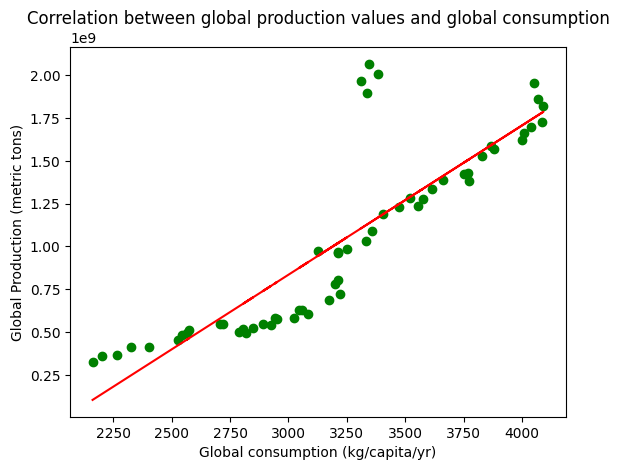

In [54]:
x=glob_data['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'] 
y=glob_data['Total Production']

corr, pval = scipy.stats.pearsonr(x, y)

print(f"Correlation, corr = {corr}")
print(f"p-value, p_val = {pval}")
#use green as color for individual points
plt.plot(x, y, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')
plt.title('Correlation between global production values and global consumption')
plt.xlabel('Global consumption (kg/capita/yr)')
plt.ylabel('Global Production (metric tons)')
plt.show()

#### Correlation

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import jaccard_score
import scipy

In [56]:
mini_data = merged_df[['Aquaculture production (metric tons)','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
mini_data

,Aquaculture production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,0.0,0.03
1,0.0,0.03
2,0.0,0.03
3,0.0,0.03
4,0.0,0.03
...,...,...
9014,10090.0,2.82
9015,10600.0,3.39
9016,10600.0,3.82
9017,10085.0,3.79


Correlation, corr = 0.03378090085883223
p-value, p_val = 0.001333877121675313


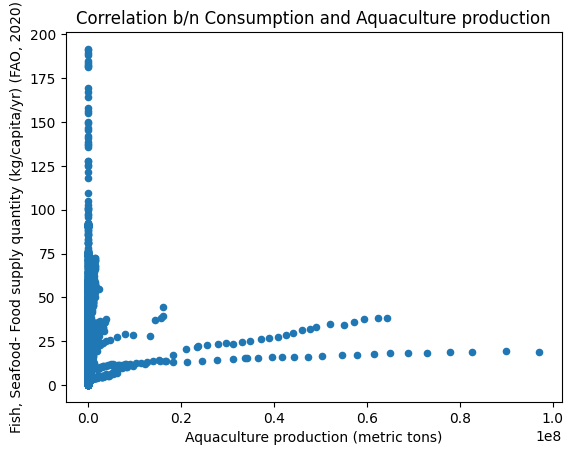

In [61]:
corr, pval = scipy.stats.pearsonr(mini_data['Aquaculture production (metric tons)'], mini_data['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'])

print(f"Correlation, corr = {corr}")
print(f"p-value, p_val = {pval}")
mini_data.plot(kind = 'scatter', x = 'Aquaculture production (metric tons)', y = 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)', title ='Correlation b/n Consumption and Aquaculture production')
plt.show()

In [58]:
print(corr)
print(pval)

0.03378090085883223
0.001333877121675313


In [59]:
mini_data2 = merged_df[['Capture fisheries production (metric tons)','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
mini_data2

,Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,300.0,0.03
1,300.0,0.03
2,300.0,0.03
3,300.0,0.03
4,300.0,0.03
...,...,...
9014,128899.0,2.82
9015,144885.0,3.39
9016,130399.0,3.82
9017,129202.0,3.79


Correlation, corr = 0.03066532546048532
p-value, p_val = 0.0035852681567529352


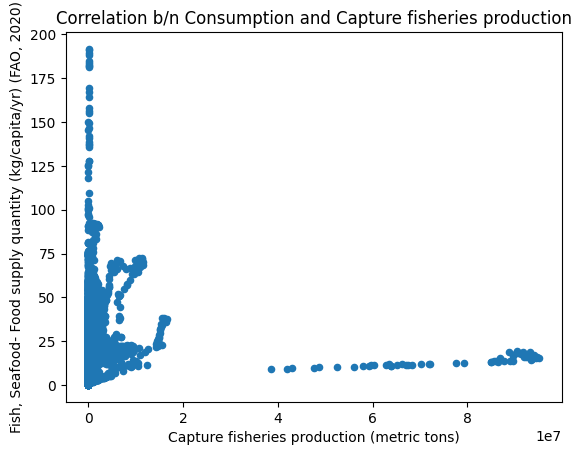

In [62]:
corr, pval = scipy.stats.pearsonr(mini_data2['Capture fisheries production (metric tons)'], mini_data2['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'])

print(f"Correlation, corr = {corr}")
print(f"p-value, p_val = {pval}")
mini_data2.plot(kind = 'scatter', x = 'Capture fisheries production (metric tons)', y = 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)', title ='Correlation b/n Consumption and Capture fisheries production')
plt.show()

In [63]:
data_df

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region
0,Afghanistan,1960,0.0,200.0,Asia
1,Afghanistan,1961,0.0,300.0,Asia
2,Afghanistan,1962,0.0,300.0,Asia
3,Afghanistan,1963,0.0,300.0,Asia
4,Afghanistan,1964,0.0,300.0,Asia
...,...,...,...,...,...
14669,Zimbabwe,2014,10600.0,144885.0,Africa
14670,Zimbabwe,2015,10600.0,130399.0,Africa
14671,Zimbabwe,2016,10085.0,129202.0,Africa
14672,Zimbabwe,2017,10300.0,100710.0,Africa


In [64]:
cons_df

,Entity,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,1961,0.03
1,Afghanistan,1962,0.03
2,Afghanistan,1963,0.03
3,Afghanistan,1964,0.03
4,Afghanistan,1965,0.03
...,...,...,...
11023,Zimbabwe,2013,2.82
11024,Zimbabwe,2014,3.39
11025,Zimbabwe,2015,3.82
11026,Zimbabwe,2016,3.79


In [65]:
cons_region = pd.merge(data_df, cons_df, on=['Entity', 'Year'])
cons_region

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Region,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,1961,0.0,300.0,Asia,0.03
1,Afghanistan,1962,0.0,300.0,Asia,0.03
2,Afghanistan,1963,0.0,300.0,Asia,0.03
3,Afghanistan,1964,0.0,300.0,Asia,0.03
4,Afghanistan,1965,0.0,300.0,Asia,0.03
...,...,...,...,...,...,...
8493,Zimbabwe,2013,10090.0,128899.0,Africa,2.82
8494,Zimbabwe,2014,10600.0,144885.0,Africa,3.39
8495,Zimbabwe,2015,10600.0,130399.0,Africa,3.82
8496,Zimbabwe,2016,10085.0,129202.0,Africa,3.79


In [66]:
# Group the dataframe by the region column and sum the production values
cons_region_sum = cons_region.groupby('Region')[['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']].sum()

# Print the resulting dataframe
cons_region_sum

,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Region,
Africa,23686.78
Americas,31278.82
Asia,38496.41
Europe,33851.96
Oceania,18113.06


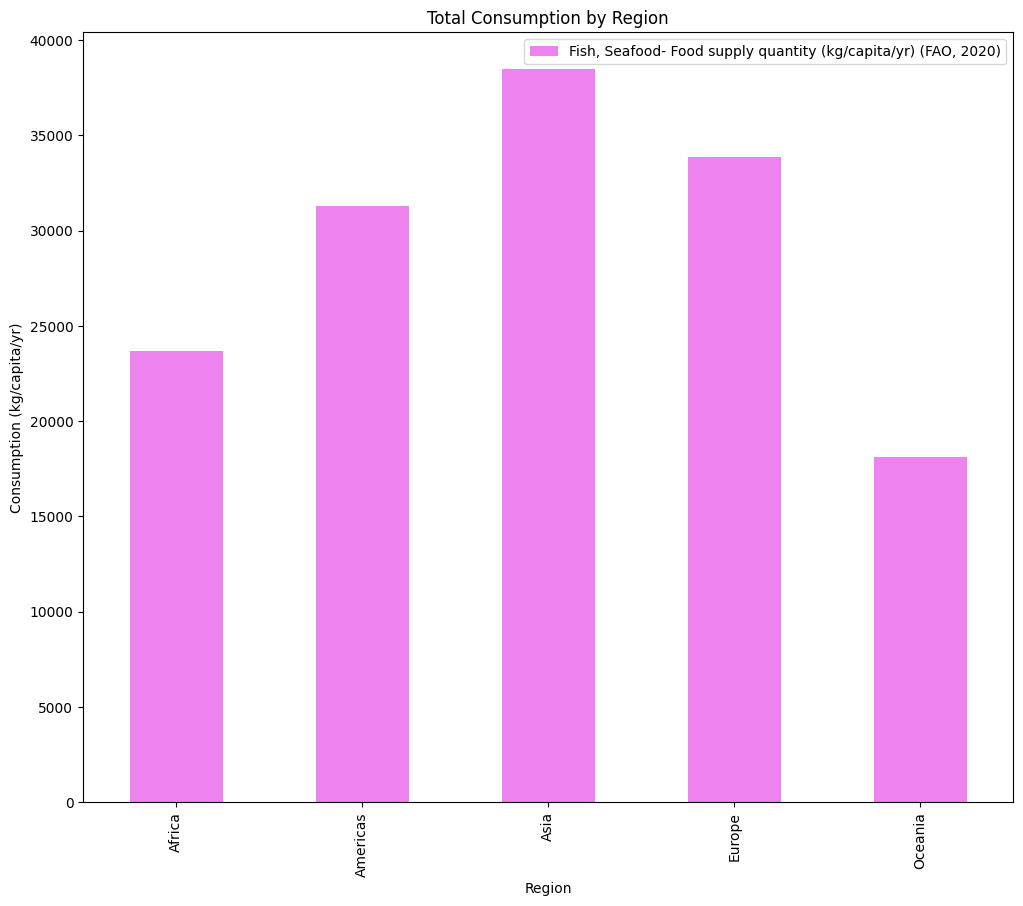

In [72]:
# Plot a grouped bar graph
cons_region_sum.plot(kind='bar', figsize=(12, 10), color='violet')

# Add title and labels
plt.title('Total Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Consumption (kg/capita/yr)')
plt.show()


In [76]:
list(cons_region_sum.index)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

([<matplotlib.patches.Wedge at 0x293f0fed0>,
 [Text(0.9591076551322976, 0.5386209296589078, 'Africa'),
  Text(-0.14073707764150464, 1.0909597036448822, 'Americas'),
  Text(-1.0976899075639992, -0.07125213563212804, 'Asia'),
  Text(0.0625914225656764, -1.0982177897945402, 'Europe'),
  Text(1.0168604573626063, -0.4195173539346272, 'Oceania')])

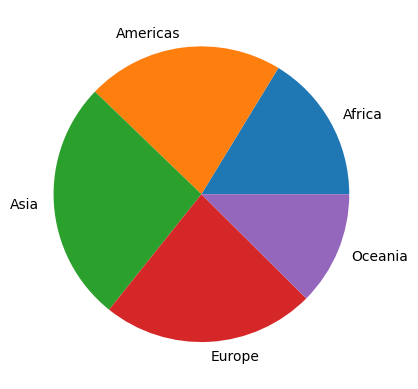

In [78]:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(cons_region_sum['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'], labels=list(cons_region_sum.index))




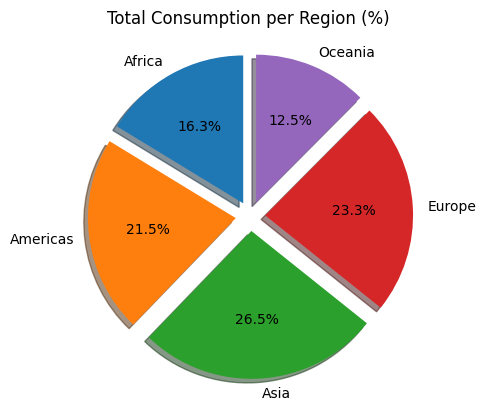

In [97]:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
sizes = cons_region_sum['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']
labels = list(cons_region_sum.index)

#fig, ax = plt.subplots()
#ax.pie(cons_region_sum['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'], labels=list(cons_region_sum.index))



explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Total Consumption per Region (%) ")
plt.show()

In [85]:
region_sum

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
Region,,
Africa,2.417214e+07,3.169976e+08
Americas,6.711237e+07,1.168901e+09
Asia,1.723388e+09,1.953563e+09
Europe,8.145585e+07,7.999446e+08
Oceania,4.892763e+06,4.552267e+07


In [86]:
region_sum['Total Production'] = region_sum['Aquaculture production (metric tons)'] + region_sum['Capture fisheries production (metric tons)']
region_sum

,Aquaculture production (metric tons),Capture fisheries production (metric tons),Total Production
Region,,,
Africa,2.417214e+07,3.169976e+08,3.411697e+08
Americas,6.711237e+07,1.168901e+09,1.236013e+09
Asia,1.723388e+09,1.953563e+09,3.676951e+09
Europe,8.145585e+07,7.999446e+08,8.814005e+08
Oceania,4.892763e+06,4.552267e+07,5.041544e+07


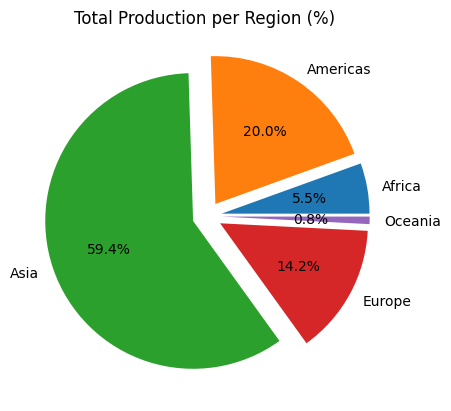

In [95]:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
sizes = region_sum['Total Production']
labels = list(region_sum.index)

#fig, ax = plt.subplots()
#ax.pie(cons_region_sum['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'], labels=list(cons_region_sum.index))



explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False) #startangle=90)

plt.title("Total Production per Region (%) ")
plt.show()